In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')

가우시안 혼합 모형(Gaussian Minture model)  
가우시안 혼합 모형은 전체 집단 내부에 속한 하위 집단의 존재를 가정한 확률 모형이다.  
가우신안 혼합 모형은 전체 집단의 확률 분포가 가우시안 분포를 따르는 경우를 말하며 흔히 정규 분포를 가우시안 분포라 부른다. 또한 가우시인 혼합 모형은 비지도 학습의 한 종류로 클러스터링에 사용된다.

가우시안 혼합 모형 실습

In [2]:
from sklearn.datasets import make_blobs # 클러스터링용 가상 데이터를 사용하기 위해 import 한다.
X, y = make_blobs(n_samples=200, n_features=2, centers=2, random_state=2) # 클러스터링용 가상 데이터를 만든다.
print(X.shape, y.shape)

(200, 2) (200,)


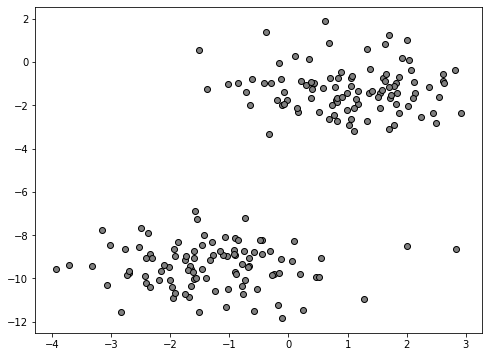

In [3]:
# 라벨링되지 않은 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolors='black', marker='o')
plt.show()

In [4]:
# 가우시안 혼합 모형
from sklearn.mixture import GaussianMixture # 가우시안 혼합 모형을 사용하기 위해 import 한다.
gmm = GaussianMixture(n_components=2, random_state=0) # 가우시안 혼합 모형 객체를 만든다.
gmm.fit(X) # 가우시안 혼합 모형을 학습시킨다.
label_gmm = gmm.predict(X) # 적합 후 예측한다.
print(label_gmm)

[1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0]


In [5]:
# 가우시안 혼합 모형 클러스터링 적용 후 데이터를 데이터프레임으로 만든다.
import pandas as pd # 데이터프레임 형태로 만들기 위해서 판다스 라이브러리를 import 한다.
gmm_columns = ['gmm_comp1', 'gmm_comp2'] # 데이터프레임의 열 이름을 정한다.
X_gmm_df = pd.DataFrame(X, columns=gmm_columns) # 가우시안 혼합 모형 클러스터링된 데이터를 데이터프레임으로 만든다.
X_gmm_df['target'] = y # 데이터프레임에 타겟 데이터를 결합한다.
X_gmm_df['label_gmm'] = label_gmm # 데이터프레임에 클러스터링한 라벨을 결합한다.
X_gmm_df

,gmm_comp1,gmm_comp2,target,label_gmm
0,0.381155,-1.644815,1,1
1,-0.583904,-8.784059,0,0
2,1.830865,-1.425235,1,1
3,1.813135,-1.924671,1,1
4,-1.655771,-9.555946,0,0
...,...,...,...,...
195,-1.914781,-8.973079,0,0
196,-0.162215,-9.755717,0,0
197,0.512491,-9.910489,0,0
198,1.329158,0.610824,1,1


In [6]:
# 타겟 클래스, 클러스터링 라벨 종류 확인
print(set(X_gmm_df['target']), set(X_gmm_df['label_gmm']))

{0, 1} {0, 1}


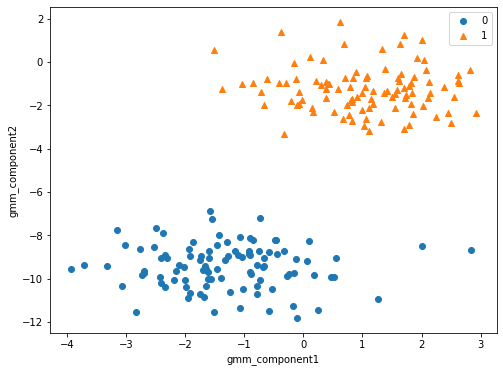

In [7]:
# 실제 타겟을 이용한 데이터 시각화
df = X_gmm_df
markers = ['o', '^'] # 시각화에 사용할 마커를 지정한다.
plt.figure(figsize=[8, 6])

# enumerate() 함수는 (인덱스, 데이터) 형태의 튜플을 리턴한다.
for index, marker in enumerate(markers):
    df_index = df[df['target'] == index] # i번째 실제 데이터에 해당되는 데이터만 추출한다.
    target_index = index # 타겟 이름을 얻어온다.
    X1 = df_index['gmm_comp1'] # 가우시안 혼합 모형으로 클러스터링된 데이터의 첫 번째 벡터를 얻어온다.
    X2 = df_index['gmm_comp2'] # 가우시안 혼합 모형으로 클러스터링된 데이터의 두 번째 벡터를 얻어온다.
    plt.scatter(X1, X2, marker=marker, label=target_index) # 산포도를 그린다.
# =====

plt.xlabel('gmm_component1')
plt.ylabel('gmm_component2')
plt.legend()
plt.show()

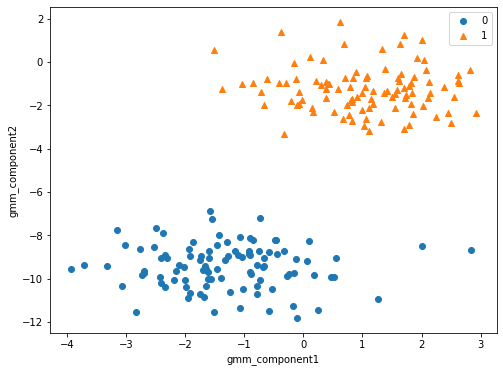

In [8]:
# 가우시안 혼합 모형 클러스터링 적용 데이터 시각화
df = X_gmm_df
markers = ['o', '^'] # 시각화에 사용할 마커를 지정한다.
plt.figure(figsize=[8, 6])

# enumerate() 함수는 (인덱스, 데이터) 형태의 튜플을 리턴한다.
for index, marker in enumerate(markers):
    # 가우시안 혼합 모형 클러스터링으로 라벨링한 데이터 중 i번째 클러스터에 해당되는 데이터만 추출한다.
    df_index = df[df['label_gmm'] == index]
    target_index = index # 타겟 이름을 얻어온다.
    X1 = df_index['gmm_comp1'] # 가우시안 혼합 모형으로 클러스터링된 데이터의 첫 번째 벡터를 얻어온다.
    X2 = df_index['gmm_comp2'] # 가우시안 혼합 모형으로 클러스터링된 데이터의 두 번째 벡터를 얻어온다.
    plt.scatter(X1, X2, marker=marker, label=target_index) # 산포도를 그린다.
# =====

plt.xlabel('gmm_component1')
plt.ylabel('gmm_component2')
plt.legend()
plt.show()